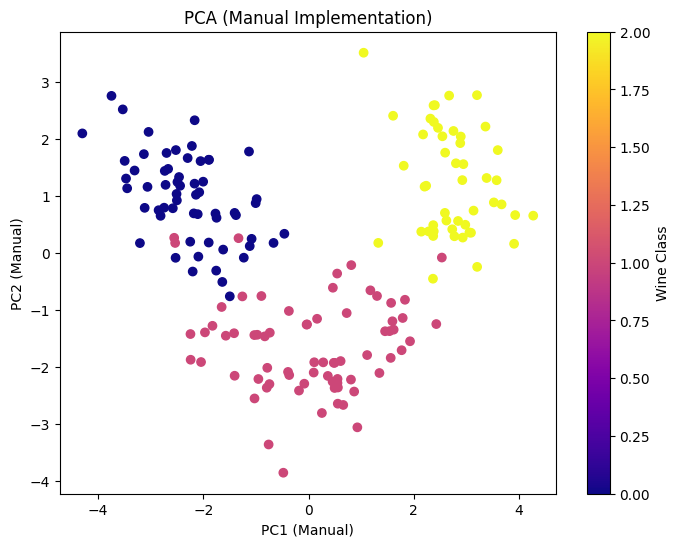

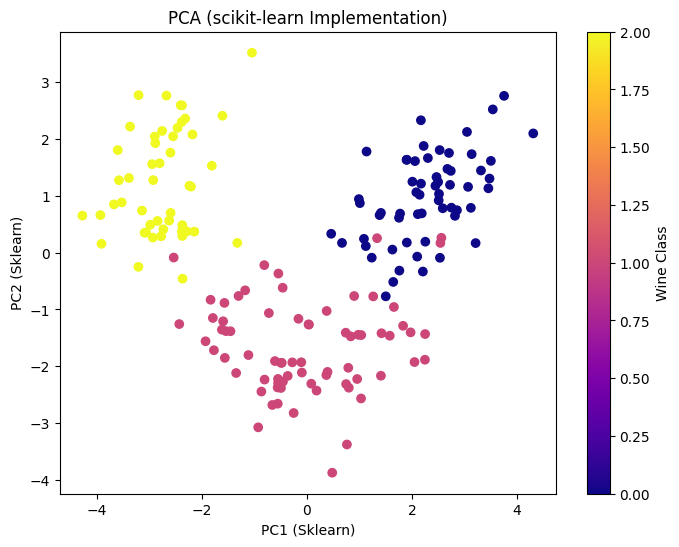

Explained variance ratio: [0.36198848 0.1920749 ]


In [5]:
# -------------------------------------------------------------
# PCA (Principal Component Analysis)
# Manual Implementation + Scikit-learn Implementation
# Dataset: Wine Dataset (13 features → reduce to 2 PCs)
# -------------------------------------------------------------

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# -------------------------------------------------------------
# 1. Load Dataset
# -------------------------------------------------------------
data = load_wine()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = data.target

# -------------------------------------------------------------
# 2. Standardize Data (mean=0, std=1)
# -------------------------------------------------------------
X_standardized = (X - X.mean()) / X.std()

# -------------------------------------------------------------
# 3. Compute Covariance Matrix
# -------------------------------------------------------------
cov_matrix = np.cov(X_standardized.T)

# -------------------------------------------------------------
# 4. Eigenvalues & Eigenvectors
# -------------------------------------------------------------
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)

# Sort eigenvalues (descending)
sorted_idx = np.argsort(eigenvalues)[::-1]
eigenvalues = eigenvalues[sorted_idx]
eigenvectors = eigenvectors[:, sorted_idx]

# -------------------------------------------------------------
# 5. Manual PCA Projection (Top 2 Principal Components)
# -------------------------------------------------------------
top2_eigenvectors = eigenvectors[:, :2]
X_pca_manual = X_standardized.values @ top2_eigenvectors

# -------------------------------------------------------------
# 6. Plot Manual PCA Output
# -------------------------------------------------------------
plt.figure(figsize=(8,6))
plt.scatter(X_pca_manual[:, 0], X_pca_manual[:, 1], c=y, cmap="plasma")
plt.xlabel("PC1 (Manual)")
plt.ylabel("PC2 (Manual)")
plt.title("PCA (Manual Implementation)")
plt.colorbar(label="Wine Class")
plt.show()

# -------------------------------------------------------------
# 7. PCA Using Scikit-learn
# -------------------------------------------------------------
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# -------------------------------------------------------------
# 8. Plot Sklearn PCA Output
# -------------------------------------------------------------
plt.figure(figsize=(8,6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap="plasma")
plt.xlabel("PC1 (Sklearn)")
plt.ylabel("PC2 (Sklearn)")
plt.title("PCA (scikit-learn Implementation)")
plt.colorbar(label="Wine Class")
plt.show()

# -------------------------------------------------------------
# 9. Explained Variance Ratio
# -------------------------------------------------------------
print("Explained variance ratio:", pca.explained_variance_ratio_)


In [8]:
# -------------------------------------------------------------
# PCA LAB — EXACT PDF CODE (with one necessary fix)
# -------------------------------------------------------------

import numpy as np

# Original PDF data
data=np.array([
[6., 3., 2., 1.],
[3., 2., 2., 1.],
[5., 4., 2., 1.],
[7., 1., 8., 1.],
[5., 3., 8., 1.],
[4., 2., 2., 1.],
[8., 6., 6., 1.],
[6., 3., 2., 1.],
[7., 1., 2., 1.]
])

# FIX: remove last constant column with zero variance
data = data[:, :3]

# 1. Standardization
mean_vec = np.mean(data, axis=0)
std_vec = np.std(data, axis=0)
standardized_data = (data - mean_vec) / std_vec

# 2. Covariance Matrix
cov = np.cov(standardized_data.T)
print("Covariance Matrix:\n", cov)

# 3. Eigen Decomposition
from scipy import linalg as la
evals, evecs = la.eig(cov)
print("\nEigenvalues:\n", evals)
print("\nEigenvectors:\n", evecs)

# 4. Sort top 2 eigenvalues
num_component = 2
sorted_key = np.argsort(evals)[::-1][:num_component]
evals = evals[sorted_key]
evecs = evecs[:, sorted_key]

print("\nTop-2 Eigenvalues:\n", evals)
print("\nTop-2 Eigenvectors:\n", evecs)

# 5. Principal Components
principal_components = np.dot(data, evecs)
print("\nPrincipal Components:\n", principal_components)

# =============================================================
# PCA USING SKLEARN (unchanged from PDF)
# =============================================================

import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.datasets import load_wine

data2 = load_wine()
df = pd.DataFrame(data2.data, columns=data2.feature_names)

scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)

pca = PCA(n_components=2)
principal_components2 = pca.fit_transform(scaled_data)

principalDf = pd.DataFrame(data=principal_components2,
                           columns=['principal component 1', 'principal component 2'])
print("\nSklearn PCA First Rows:\n", principalDf.head())
print("\nExplained Variance Ratio:\n", pca.explained_variance_ratio_)


Covariance Matrix:
 [[1.125      0.30338994 0.43462542]
 [0.30338994 1.125      0.11720976]
 [0.43462542 0.11720976 1.125     ]]

Eigenvalues:
 [1.71419092+0.j 0.64513884+0.j 1.01567023+0.j]

Eigenvectors:
 [[ 0.66818823  0.73934255  0.08304869]
 [ 0.46033951 -0.32315998 -0.82683442]
 [ 0.58447586 -0.59071162  0.55628028]]

Top-2 Eigenvalues:
 [1.71419092+0.j 1.01567023+0.j]

Top-2 Eigenvectors:
 [[ 0.66818823  0.08304869]
 [ 0.46033951 -0.82683442]
 [ 0.58447586  0.55628028]]

Principal Components:
 [[ 6.55909961 -0.86965058]
 [ 4.09419542 -0.29196222]
 [ 6.35125089 -1.77953369]
 [ 9.81346397  4.20474865]
 [ 9.39776653  2.38498244]
 [ 4.76238365 -0.20891353]
 [11.61439802 -0.95893534]
 [ 6.55909961 -0.86965058]
 [ 6.30660882  0.86706695]]

Sklearn PCA First Rows:
    principal component 1  principal component 2
0               3.316751               1.443463
1               2.209465              -0.333393
2               2.516740               1.031151
3               3.757066        